<a href="https://colab.research.google.com/github/yakamurii/analise-temporal-e-predicoes-de-indicadores-economicos/blob/main/analise_temporal_e_predicoes_de_indicadores_economicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Temporal e Predições de Indicadores Econômicos do Banco Central


### Este projeto tem como objetivo capturar dados públicos referentes ao indicador de atividade econômica produzido pelo Banco Central, modelar esses dados em uma série temporal, criar um modelo de predição baseado em machine learning e visualizar os resultados históricos e preditivos no mesmo gráfico.


##Sequência de Etapas



###Instalando Biblioteca Prophet

> Adicionar aspas



In [ ]:
!pip install prophet

### Importando Bibliotecas

> Adicionar aspas



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from prophet import Prophet

###Obtenção dos dados da API

In [ ]:
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.24363/dados?formato=json"
response = requests.get(url)
if response.status_code == 200:
    dados = response.json()
    dados = pd.DataFrame(dados)
else:
    print("Erro ao obter os dados da API.")

dados.head()

,data,valor
0,01/01/2003,96.15
1,01/02/2003,98.67
2,01/03/2003,103.41
3,01/04/2003,102.19
4,01/05/2003,100.30


### Ajustando da Data

In [ ]:
dados['data'] = pd.to_datetime(dados['data'], dayfirst=True)
dados

,data,valor
0,2003-01-01,96.15
1,2003-02-01,98.67
2,2003-03-01,103.41
3,2003-04-01,102.19
4,2003-05-01,100.30
...,...,...
249,2023-10-01,145.07
250,2023-11-01,144.31
251,2023-12-01,144.09
252,2024-01-01,140.52


### Convertendo a coluna "valor" para um valor do tipo float, porque ele estava como String no Dataframe

In [ ]:
dados['valor'] = dados['valor'].astype(float)
dados

,data,valor
0,2003-01-01,96.15
1,2003-02-01,98.67
2,2003-03-01,103.41
3,2003-04-01,102.19
4,2003-05-01,100.30
...,...,...
249,2023-10-01,145.07
250,2023-11-01,144.31
251,2023-12-01,144.09
252,2024-01-01,140.52


### Mudando o nome das colunas

In [ ]:
dados.columns = ["ds", "y"]
dados

,ds,y
0,2003-01-01,96.15
1,2003-02-01,98.67
2,2003-03-01,103.41
3,2003-04-01,102.19
4,2003-05-01,100.30
...,...,...
249,2023-10-01,145.07
250,2023-11-01,144.31
251,2023-12-01,144.09
252,2024-01-01,140.52


###Filtrando os dados dos últimos 5 anos

In [ ]:
cinco_anos_atras = pd.Timestamp.now() - pd.DateOffset(years=5)
df_ultimos_cinco_anos = dados[dados['ds'] >= cinco_anos_atras]
df_ultimos_cinco_anos

,ds,y
196,2019-05-01,139.60
197,2019-06-01,135.30
198,2019-07-01,143.34
199,2019-08-01,142.13
200,2019-09-01,138.51
201,2019-10-01,143.14
202,2019-11-01,139.10
203,2019-12-01,137.63
204,2020-01-01,134.09
205,2020-02-01,134.53


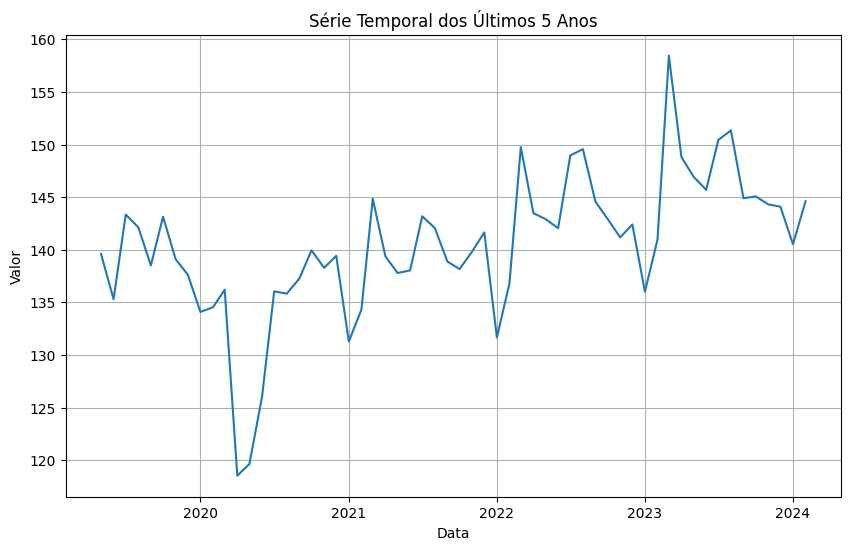

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_ultimos_cinco_anos['ds'], df_ultimos_cinco_anos['y'], linestyle='-')
plt.title('Série Temporal dos Últimos 5 Anos')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

###Criando e Treinando o Modelo

In [ ]:
modelo = Prophet()
modelo.fit(df_ultimos_cinco_anos)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o30g3he/mf0vwyno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o30g3he/y_22vwfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41892', 'data', 'file=/tmp/tmp4o30g3he/mf0vwyno.json', 'init=/tmp/tmp4o30g3he/y_22vwfv.json', 'output', 'file=/tmp/tmp4o30g3he/prophet_modelsc9c_iro/prophet_model-20240429131711.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:17:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:17:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Prevendo os próximos períodos

In [ ]:
datas_futuras = modelo.make_future_dataframe(periods=12, freq='MS')
datas_futuras.tail()

,ds
65,2024-10-01
66,2024-11-01
67,2024-12-01
68,2025-01-01
69,2025-02-01


In [ ]:
datas_futuras = datas_futuras[datas_futuras['ds'] > pd.Timestamp.now()]
datas_futuras

,ds
60,2024-05-01
61,2024-06-01
62,2024-07-01
63,2024-08-01
64,2024-09-01
65,2024-10-01
66,2024-11-01
67,2024-12-01
68,2025-01-01
69,2025-02-01


In [ ]:
previsao = modelo.predict(datas_futuras)
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5,2024-10-01,150.251718,145.694438,154.653804
6,2024-11-01,149.662868,145.394499,154.271185
7,2024-12-01,152.222427,147.444805,156.708777
8,2025-01-01,144.043395,139.648155,148.717470
9,2025-02-01,150.757823,146.209278,154.911516


###Visualização dos Dados

####(Não consegui adaptar o gráfico para representar uma linha suave.)

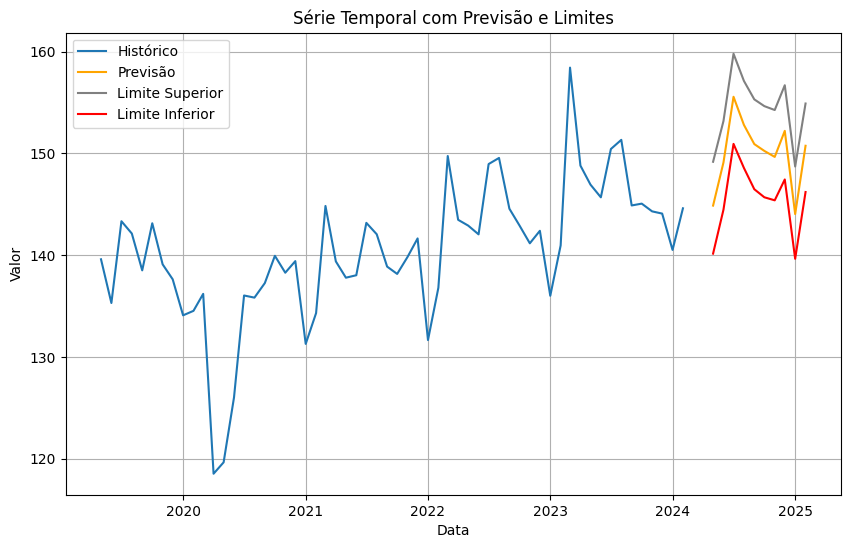

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_ultimos_cinco_anos['ds'], df_ultimos_cinco_anos['y'], linestyle='-', label='Histórico')

plt.plot(previsao['ds'], previsao['yhat'], linestyle='-', color='orange', label='Previsão')


plt.plot(previsao['ds'], previsao['yhat_upper'], linestyle='-', color='gray', label='Limite Superior')
plt.plot(previsao['ds'], previsao['yhat_lower'], linestyle='-', color='red', label='Limite Inferior')

plt.title('Série Temporal com Previsão e Limites')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.show()

##Resultados: abordagem utilizada e análise dos resultados obtidos

A abordagem utilizada neste projeto de ciência de dados consistiu na coleta dos dados públicos do indicador de atividade econômica produzido e liberado pelo Banco Central, diretamente do endereço online fornecido, sem a necessidade de download manual. Os dados foram então preparados, ajustando o tipo do campo de data para datetime e do valor para float. Em seguida, foi realizada uma análise exploratória inicial dos dados, destacando padrões temporais e tendências históricas.


Para modelar a série temporal, foi empregada a biblioteca Prophet, uma ferramenta de previsão de séries temporais desenvolvida pelo Facebook. O modelo Prophet foi treinado com os dados dos últimos cinco anos e utilizado para fazer previsões futuras do indicador de atividade econômica para os próximos meses.


Os resultados da previsão foram visualizados em um gráfico que inclui tanto os dados históricos como a previsão futura, juntamente com os limites superior e inferior da previsão. A análise dos resultados mostra que o modelo foi capaz de capturar as tendências subjacentes nos dados históricos e fornecer previsões razoáveis para o comportamento futuro do indicador de atividade econômica.


A escolha do modelo Prophet se justifica pela sua capacidade de lidar com sazonalidades, feriados e tendências não lineares com facilidade, tornando-o adequado para modelagem de séries temporais com padrões complexos. Além disso, sua facilidade de uso e interpretabilidade o tornam uma escolha prática para projetos de ciência de dados com foco em previsão de séries temporais, como neste caso.

